<a href="https://colab.research.google.com/github/brunomelao/CEL039/blob/main/BRUNO_DE_OLIVEIRA_MELAO_Atividade_5_Margens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Crie uma função que faça o cálculo da margem de fase, margem de ganho, frequência de cruzamento de ganho e frequência de cruzamento de fase.

**OBS: A função margin ou qualquer correlacionada que faz essa tarefa será considerada como erro da atividade e a nota mínima será entregue para o trabalho**). 

Além disso mostre num gráfico de Bode os valores dessas variáveis. 

Os comandos relacionados a bode estão liberados. Utilize sua função para as atividades abaixo:

2) Considere o sistema de controle com realimentação unitária cuja função de transferência de  malha aberta é:

$G(s) = \frac{K}{s(s^2 +s +4)}$


Determine o valor do ganho K tal que a margem de fase seja de 50°. Qual é a margem de ganho com esse mesmo valor de K? Utilize sua função da número 1 para plotar esse gráfico mostrando as margens.
 





In [2]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 13.6 MB/s eta 0:00:00



       1
---------------
s^3 + s^2 + 4 s

1.7320508075688767
1.7320508075688774

     3.464
---------------
s^3 + s^2 + 4 s

[8.66025593e+02 8.65905954e+02 8.65786332e+02 ... 3.46698648e-09
 3.46554981e-09 3.46411374e-09]
Margem de Ganho: 1.1546634287375683
Margem de fase: 29.99929549771258
Frequência de cruzamento de ganho: 1.732057824014277
Frequência de cruzamento de fase: 1.9999678359186026


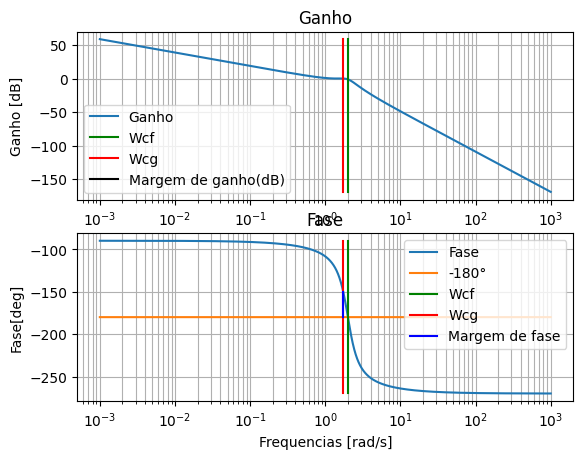

In [4]:
import numpy as np
import control as co
import matplotlib.pyplot as plt


def calculaMargem(ft):
  omega=np.logspace(-3,3,100000)
  modulo,fase,w=co.bode(ft,omega,plot=False)
  modulo_dB=20*np.log10(modulo)
  fase_deg=180*fase/np.pi
  print(modulo)
  # Determinação da frequencia de cruzamento de ganho e Margem de fase
  indice_wcg=np.where(modulo<1)[0]
  if len(indice_wcg)==0:
    MF=np.inf
    wcg=np.inf
  else:
    indice_wcg=indice_wcg[0]
    wcg= (w[indice_wcg]+w[indice_wcg-1])/2 
    # As médias entre o indice e o anterior foram feitas visando minimizar o erro devido a amostragem dos parâmetros
    MF=180 + (fase_deg[indice_wcg]+fase_deg[indice_wcg-1])/2

  # Determinação da frequencia de cruzamento de fase e Margem de ganho
  indice_wcf=np.where(abs(fase_deg)>180)[0]
  if len(indice_wcf)==0:
    MG=np.inf
    wcf=np.inf
  else:
    indice_wcf=indice_wcf[0]
    wcf= (w[indice_wcf]+w[indice_wcf-1])/2 
    # As médias entre o indice e o anterior foram feitas visando minimizar o erro devido a amostragem dos parâmetros
    MG=1/((modulo[indice_wcf]+modulo[indice_wcf-1])/2)
  
  #Plotar parâmetros junto com o diagrama de Bode
  fig,(Ganho,Fase) = plt.subplots(nrows= 2, ncols=1)
  #figsize : (float, float),, default: largura, altura em polegadas
  Ganho.set_title('Ganho')
  Ganho.set_ylabel('Ganho [dB]')
  Ganho.semilogx(w,modulo_dB,label='Ganho')
  Ganho.grid(True,which="both")
  #Plot da Frequecia de Fase - Eixo x tem que ser o wcp. no eixo y uma reta que vai do valor mini
  Ganho.semilogx([wcf,wcf],[np.min(modulo_dB),np.max(modulo_dB)],'g',label='Wcf')
  Ganho.semilogx([wcg,wcg],[np.min(modulo_dB),np.max(modulo_dB)],'r',label='Wcg')
  Ganho.semilogx([wcf,wcf],[0,-20*np.log10(MG)],'k',label='Margem de ganho(dB)')
  Ganho.legend()
  Fase.set_title('Fase')
  Fase.set_ylabel('Fase[deg]')
  Fase.set_xlabel('Frequencias [rad/s]')
  #Plot do Vetor de Fases
  Fase.semilogx(w,fase_deg,label = 'Fase')
  #Plot da reta -180°. Todas as frequencias e um vetor de mesmo tamanho com valor -180°.
  Fase.semilogx(w,-180*np.ones(len(w)),label = '-180°')
  #Plot da Frequecia de Fase - Eixo x tem que ser o wcp. no eixo y uma reta que vai do valor mini
  Fase.semilogx([wcf,wcf,],[np.min(fase_deg),np.max(fase_deg)],'g',label='Wcf')
  #Plot da Frequecia de Ganho - Eixo x tem que ser o wcg. no eixo x uma reta que vai do valor min
  Fase.semilogx([wcg,wcg],[np.min(fase_deg),np.max(fase_deg)],'r',label='Wcg')
  #Plot da margem de fase - Eixo x tem que ser o wcg. No eixo x uma reta que vai de -180° até -18
  Fase.semilogx([wcg,wcg],[-180,-180 + MF],'b',label='Margem de fase')
  Fase.grid(True,which="both")
  Fase.legend()

  return MG,MF,wcg,wcf


num=[1]
den=[1,1,4,0]
ft=co.tf(num,den)
print(ft)

#Questão 2
MF_desejada=180-30
#Para achar a frequência para essa margem de fase 
atangente_w=(np.tan((MF_desejada-90)*np.pi/180))
print(atangente_w)
w_desejado=(-1+np.sqrt(1-4*(atangente_w)*(-4*atangente_w)))/(2*atangente_w)
print(w_desejado)
Kp=(w_desejado*np.sqrt((4-w_desejado**2)**2+(w_desejado)**2)) #calculado pela média para diminuir erros por conta da amostragem
#Kp=3.464105
ft=ft*Kp
print(ft)

Mganho,Mfase,freqCG,freqCF=calculaMargem(ft)
print("Margem de Ganho:", Mganho)
print("Margem de fase:", Mfase)
print("Frequência de cruzamento de ganho:", freqCG)
print("Frequência de cruzamento de fase:", freqCF)
